<a href="https://colab.research.google.com/github/samjurassic/datascience-demo/blob/main/education/ml_tree_incomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Load libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO

In [20]:
file_url = "https://raw.githubusercontent.com/samjurassic/datascience-demo/main/education/competition_data_v2.csv"
students = pd.read_csv(file_url)

# students.describe(include="all")
students.head()

,index,borough,age,gpa,days_missed,major,full_time,freshman,first_generation,employed,pell_grant,grade
0,8548,Queens,22.056321,3.148877,2,Computer Information Systems,1,1,0,0,1,P
1,13142,Outside NYC,22.345859,2.333427,16,Computer Science,1,1,1,0,1,DWFI
2,5703,Outside NYC,25.161810,3.201160,16,Computer Information Systems,0,1,1,1,1,DWFI
3,13839,Bronx,18.302638,2.715759,2,Computer Information Systems,1,1,0,1,0,P
4,5384,Outside NYC,25.673518,2.079928,2,Computer Information Systems,1,0,1,0,1,P


In [43]:
# recode DWFI as 0, P as 1
students["outcome"] = students.grade.apply(lambda x: int(x == "DWFI"))

# create dummy variables (0, 1) for borough and major
students_full = pd.get_dummies(students, columns=["borough", "major"], drop_first=True)
# students_full.columns

#split dataset in features and target variable
feature_cols = ['age', 'gpa', 'full_time', 'freshman', 'first_generation', 'employed',
       'pell_grant', 'borough_Brooklyn', 'borough_Manhattan',
       'borough_Outside NYC', 'borough_Queens', 'borough_Staten Island',
       'major_Computer Science']

X = students_full[feature_cols] # Features
y = students_full.outcome # Target variable

# Use train_test_split to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15) # 70% training and 30% test

In [22]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred).round(3))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
print(c_matrix)

Accuracy: 0.724
Precision: 0.646
Recall: 0.597
[[4234 1051]
 [1297 1918]]


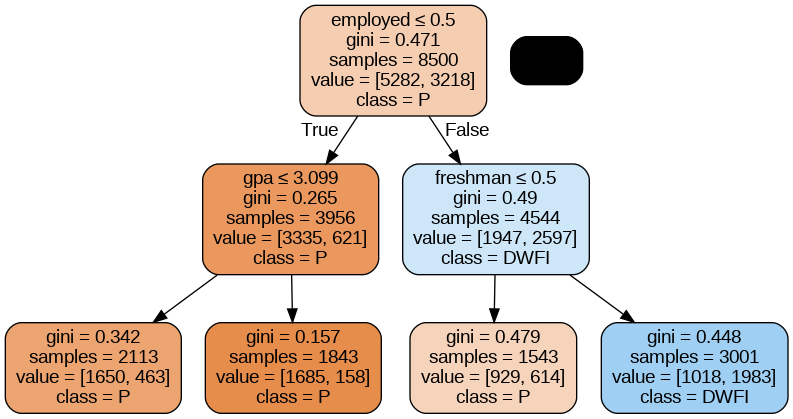

In [23]:
# graph decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['P','DWFI'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('students.png')
Image(graph.create_png())

In [24]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf = RandomForestClassifier(criterion="gini", max_depth=3, n_estimators=100)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
print(c_matrix)

Accuracy: 0.763
Precision: 0.78
Recall: 0.519
[[4813  472]
 [1545 1670]]


In [25]:
### GRADIENT BOOSTING

# Create Decision Tree classifer object
clf_gb = GradientBoostingClassifier(max_depth=3, n_estimators=300, learning_rate=0.05, verbose=True)

# Train Decision Tree Classifer
clf_gb = clf_gb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb = clf_gb.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gb).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb).round(3))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)

      Iter       Train Loss   Remaining Time 
         1           1.3011            9.50s
         2           1.2781            7.41s
         3           1.2571            6.68s
         4           1.2379            6.29s
         5           1.2199            6.05s
         6           1.2037            5.91s
         7           1.1884            6.00s
         8           1.1746            5.89s
         9           1.1615            5.90s
        10           1.1497            5.80s
        20           1.0648            5.48s
        30           1.0153            5.17s
        40           0.9817            5.16s
        50           0.9567            4.96s
        60           0.9383            4.80s
        70           0.9237            4.77s
        80           0.9124            4.61s
        90           0.9033            4.36s
       100           0.8960            4.09s
       200           0.8582            2.14s
       300           0.8394            0.00s
Accuracy:

In [26]:
### Compare AUC

## NOTE: You need predicted probabilities to do this - not predicted classes

print(f"Decision tree: {round(metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), 4)}")
print(f"Random forest: {round(metrics.roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1]), 4)}")
print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")


Decision tree: 0.7597
Random forest: 0.8411
Gradient boosting: 0.8563


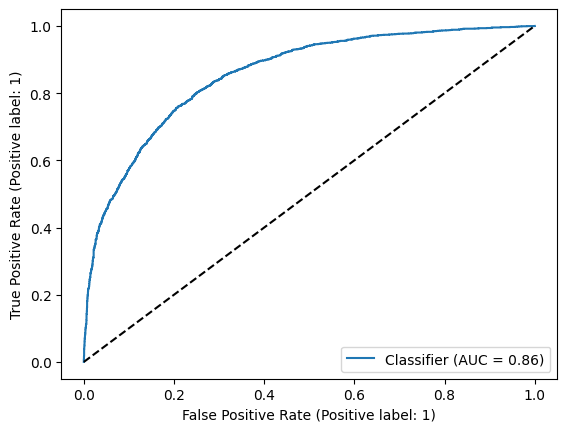

In [47]:
# Plot the ROC curve
display = metrics.RocCurveDisplay.from_predictions(
    y_true=y_test,
    y_pred=clf_gb.predict_proba(X_test)[:,1]
)

# plot the dashed line to show a random model (BAD, as if coin flip)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')

In [28]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import numpy as np

param_grid = {
    # "loss":["log_loss", "exponential"],
    "max_depth":[6, 3],
    "learning_rate": [0.01, 0.05],
    "subsample":[0.10, 0.2],
    "n_estimators":[100, 200, 250, 400]
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5),
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],

    }

gbt = GradientBoostingClassifier(random_state=8, verbose=False)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search = GridSearchCV(estimator=gbt, param_grid=param_grid, scoring="roc_auc", cv=None)
search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=8,
                                                  verbose=False),
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [6, 3],
                         'n_estimators': [100, 200], 'subsample': [0.1, 0.2]},
             scoring='roc_auc')

In [29]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])

# pd.concat([results_df.drop(columns="params"), results_df["params"].apply(pd.Series)])
print(search.best_params_)

# results_df = results_df.set_index(
#     results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
# ).rename_axis("kernel")
results_df[["param_learning_rate", "param_max_depth", "param_n_estimators", "param_subsample", "rank_test_score", "mean_test_score", "std_test_score"]]

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.2}


,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,rank_test_score,mean_test_score,std_test_score
13,0.05,3,100,0.2,1,0.853257,0.003803
15,0.05,3,200,0.2,2,0.852155,0.002857
12,0.05,3,100,0.1,3,0.852097,0.002145
3,0.01,6,200,0.2,4,0.850822,0.003272
2,0.01,6,200,0.1,5,0.849866,0.003384
14,0.05,3,200,0.1,6,0.849556,0.003651
1,0.01,6,100,0.2,7,0.849003,0.004416
6,0.01,3,200,0.1,8,0.848805,0.004265
0,0.01,6,100,0.1,9,0.847727,0.003779
9,0.05,6,100,0.2,10,0.846903,0.003534


In [44]:
### GRADIENT BOOSTING

# Create Decision Tree classifer object
clf_gb = GradientBoostingClassifier(**search.best_params_)

# Train Decision Tree Classifer
clf_gb = clf_gb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb = clf_gb.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gb).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb).round(3))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)

print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")

Accuracy: 0.782
Precision: 0.74
Recall: 0.654
[[2724  444]
 [ 669 1263]]
Gradient boosting: 0.8562


In [31]:
param_grid_rf = {
    "max_depth":[2, 5],
    "n_estimators":[100, 400],
    "min_impurity_decrease": [0.01, 0.03],
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5),
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],
}

rf_grid = RandomForestClassifier(criterion="gini", random_state=8)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search_rf = GridSearchCV(estimator=rf_grid, param_grid=param_grid_rf, scoring="roc_auc", cv=cv)
search_rf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=0),
             estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': [2, 5],
                         'min_impurity_decrease': [0.01, 0.03],
                         'n_estimators': [100, 400]},
             scoring='roc_auc')

In [32]:
results_rf = pd.DataFrame(search_rf.cv_results_)
results_rf = results_rf.sort_values(by=["rank_test_score"])

print(search_rf.best_params_)

results_rf[["param_min_impurity_decrease", "param_max_depth", "param_n_estimators", "rank_test_score", "mean_test_score", "std_test_score"]]

{'max_depth': 2, 'min_impurity_decrease': 0.01, 'n_estimators': 100}


,param_min_impurity_decrease,param_max_depth,param_n_estimators,rank_test_score,mean_test_score,std_test_score
0,0.01,2,100,1,0.829808,0.006815
1,0.01,2,400,2,0.828999,0.007842
4,0.01,5,100,3,0.828488,0.006488
5,0.01,5,400,4,0.827994,0.007891
7,0.03,5,400,5,0.755625,0.038187
3,0.03,2,400,6,0.752861,0.035497
2,0.03,2,100,7,0.746215,0.028565
6,0.03,5,100,7,0.746215,0.028565


<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

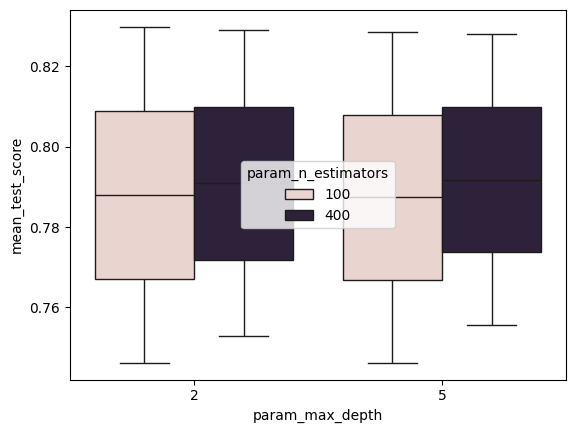

In [33]:
sns.boxplot(results_rf, x="param_max_depth", y="mean_test_score", hue="param_n_estimators")

In [34]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf = RandomForestClassifier(**search_rf.best_params_)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
print(c_matrix)

Accuracy: 0.73
Precision: 0.802
Recall: 0.379
[[4985  300]
 [1998 1217]]


In [37]:
def get_comp_test_data():

  comp_test_fn = "https://raw.githubusercontent.com/samjurassic/datascience-demo/main/education/competition_data_test_v2.csv"

  comp_test = pd.read_csv(comp_test_fn, index_col="index")

  # create dummy variables (0, 1) for borough and major
  comp_full = pd.get_dummies(comp_test, columns=["borough", "major"], drop_first=True)

  return comp_full

comp_X = get_comp_test_data()

def make_predictions_df(model, X, features):
  probs = model.predict_proba(X[features])[:,1]
  return pd.DataFrame(probs, index=X.index.values, columns=["outcome"])

# replace
output_df = make_predictions_df(model=clf_gb, X=comp_X, features=feature_cols)

# check output
assert len(output_df) == 17000
assert output_df.index[-1] == 16998
assert output_df.columns[0] == "outcome"

# write final predictions file
output_df.to_csv("drazhar_predictions_rf2.csv", index=True)

<Axes: xlabel='outcome', ylabel='Count'>

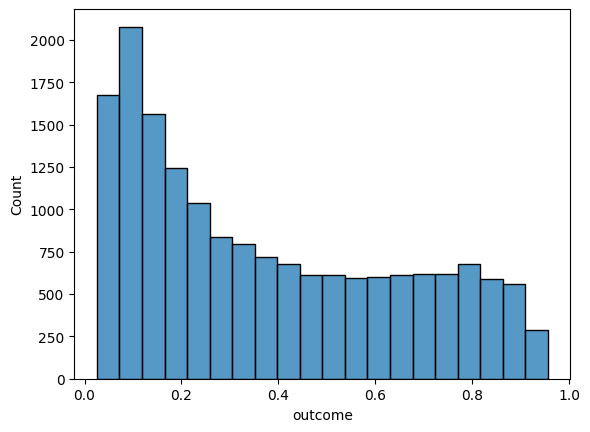

In [48]:
# compare new predictions to test data predictions
sns.histplot(output_df.outcome, bins=20)

<Axes: ylabel='Count'>

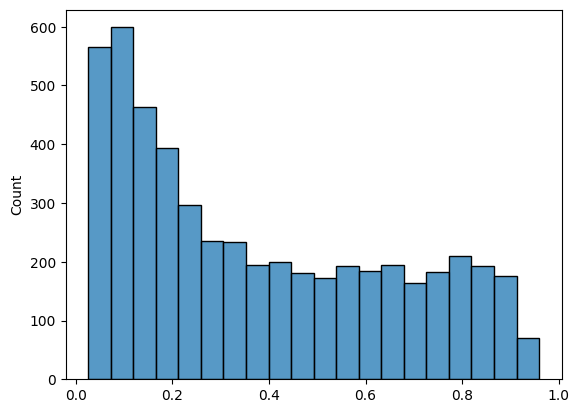

In [49]:
# plot old predictions
sns.histplot(clf_gb.predict_proba(X_test)[:,1], bins=20)

Compare descriptive statistics between new and old predictions

In [61]:
stats = pd.DataFrame()
stats["training_predictions"]  = pd.Series(clf_gb.predict_proba(X_test)[:,1]).describe()
stats["test_predictions"] = output_df.outcome.describe()
stats["difference"] = stats.training_predictions - stats.test_predictions

stats.head(10)

,training_predictions,test_predictions,difference
count,5100.000000,17000.000000,-11900.000000
mean,0.376625,0.377363,-0.000738
std,0.273489,0.270470,0.003020
min,0.026084,0.025641,0.000443
25%,0.128180,0.132532,-0.004352
50%,0.303614,0.308524,-0.004910
75%,0.612878,0.607779,0.005099
max,0.959306,0.955577,0.003728
